# Computing Derivatives and Gradients Automatically with TensorFlow
by Gallileu Genesis

Gradients and derivatives are used in many optimizing algorithms, such as Gradient Descent and machine learning algorithms such as backpropagation to form neural networks.

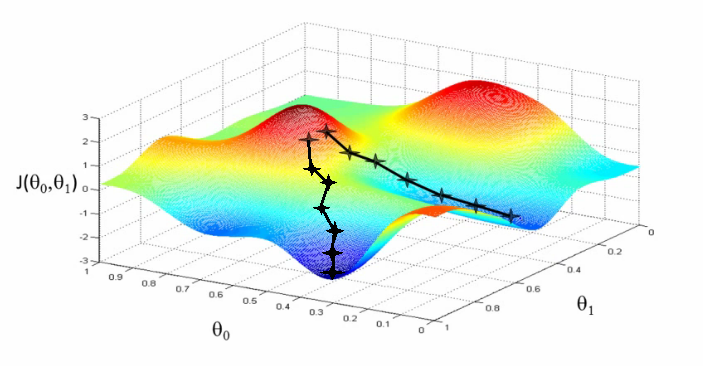

The gradient of a function can be calculated by applying Chain rule.

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$


Let's start with a simple function, as shown below

$$f(x) = x^2+1$$

whose derivative is

$$\frac{df(x)}{dx} = 2x$$

This operation can be done using TensorFlow, as following:

In [145]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [146]:
x = tf.linspace(-5, 5, 100)

# Lets use the GradientTape(), a API for automatic differentiation.
with tf.GradientTape() as tape:
    tape.watch(x)
    fx = x**2+1  #our target function

In [147]:
# df = (x^2+1) * dx
df_dx = tape.gradient(fx, x)

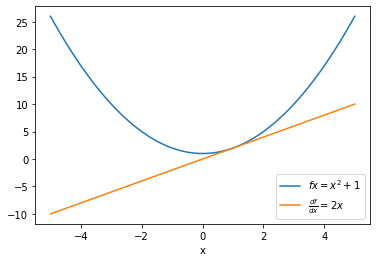

In [148]:
plt.plot(x.numpy(), fx.numpy(), label="$fx = x^2+1$")
plt.plot(x.numpy(), df_dx.numpy(), label=r"$\frac{df}{dx} = 2x$")
plt.legend()
_ = plt.xlabel('x')

Let's try something a little bit more complicated

In [149]:
x = tf.linspace(-5, 5, 100)

with tf.GradientTape() as tape:
    tape.watch(x)
    fx =  5*tf.sin(2*x) + x**2 #our target function 

In [150]:
dfx_dx = tape.gradient(fx, x)

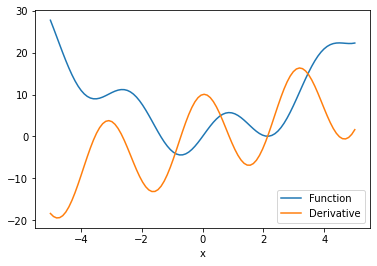

In [151]:
plt.plot(x, fx, label="Function")
plt.plot(x, dfx_dx, label="Derivative")
plt.legend()
_ = plt.xlabel('x')

What if our function depends on two or more variables?

In [152]:
x = tf.Variable(tf.linspace(-1, 1, 100), name='x')
y = tf.Variable(tf.linspace(-1, 1, 100), name='y')

with tf.GradientTape(persistent=True) as tape:
    fxy =  (tf.sin(4*x)-tf.cos(5*y))/5 #our target function 

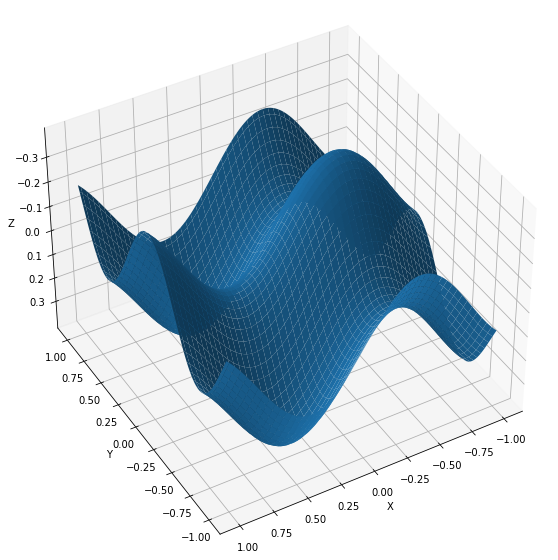

In [153]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

level_x = np.arange(0, 2, 0.02)
level_y = np.arange(0, 3, 0.02)

X, Y = np.meshgrid(x, y)

Z = (tf.sin(4*X)-tf.cos(5*Y))/5

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(-140, 120)
plt.show()

We can obtain the partial derivatives of the function with respect to each of the variables.

In [154]:
[dfxy_dx, dfxy_dy] = tape.gradient(fxy, [x, y])

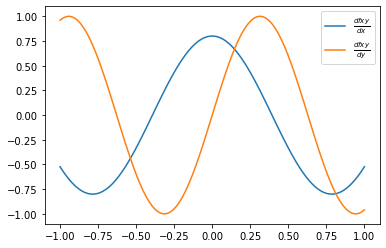

In [155]:
plt.plot(x.numpy(), dfxy_dx, label=r"$\frac{dfxy}{dx}$")
plt.plot(y.numpy(), dfxy_dy, label=r"$\frac{dfxy}{dy}$")
plt.legend()

plt.show()

Tensorflow also has some optimization methods implemented such as Stochastic gradient descent (SGD) and rmsprop. 

let's check it out .

In [156]:
x = tf.Variable(0.35) #initial value of x
y = tf.Variable(-0.60) #initial value of y

def fxy():
    return (tf.sin(4*x)-tf.cos(5*y))/5 #our target function 

In [157]:
# Lets call the SGD optmizer to minize the fxy function w.r.t x and y
opt = tf.optimizers.SGD(learning_rate=0.01)
step = opt.minimize(fxy, var_list=[x,y])

Let's draw a trajectory of a gradient descent in 2D

In [158]:
from matplotlib import animation, rc
from IPython.display import HTML, display_html

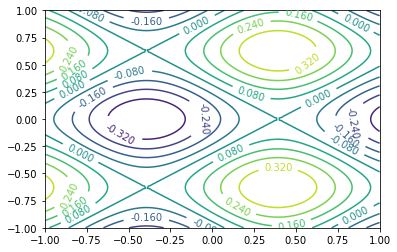

In [159]:
# nice figure settings
fig, ax = plt.subplots()

level_x = tf.linspace(-1, 1, 100)
level_y = tf.linspace(-1, 1, 100)

X, Y = np.meshgrid(level_x, level_y)

Z = (tf.sin(4*X)-tf.cos(5*Y))/5
 
contour = ax.contour(X, Y, Z, 10)
ax.clabel(contour, inline=1, fontsize=10)
line, = ax.plot([], [], lw=2)

In [160]:
# start animation with empty trajectory
def init():
    line.set_data([], [])
    return (line,)

 
trajectory = [[x.numpy(),y.numpy()]]

# one animation step (make one SGD step)
def animate(i):
    step = opt.minimize(fxy, var_list=[x,y])
    trajectory.append([x.numpy(),y.numpy()])
    line.set_data(*zip(*trajectory))
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=150, interval=20, blit=True)

In [161]:
# Show animation
try:
    display_html(HTML(anim.to_html5_video()))
except (RuntimeError, KeyError):
    anim.save(None, writer = 'mencoder', fps=15)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACFZW1kYXQAAAKgBgX//5zcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxOSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTkgbG9va2FoZWFkX3RocmVhZHM9
MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2Nv
bXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9
MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50
PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhl
YWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02
OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAABl02WIhAAz//727L4FNf2f0JcR
LMXaSnA+KqSAgHc0wAAAAwAAeRX8EmT9QEEYs6osqjT6LQ1RRNRpTDm+1PFShwyosNcB+sPPyML6
V8RLfznYxYD7lRKYzdDuWmbrDC8y1WFkXCg/b5fNJo9Jtat0i41U+gAANhen2ZubqKj7mK1/mywV
8JK2dTUP9a2ptXwrq2KJuma6Zomqqvp30OqRLgLR8VWpSyv4YGZ1s0PRL2t17S9a0JpE+wOGXY7T
cSv+TRGGZe/C2n9HoUnFV5Zrh1+kPOxUMb9mZ77GMDTF9VdgCXf2+arWDRu/jg1Bot5dDUjzVNBI
vuW3GD8joJy0XaKgnoBsw2tOTXyFL2UJBAWDXqg5RwF0ZWUi8Q+V44JGmAZeduG0SZI9Rs+vFkeE
DgVq7tDHD4L5z7nGGk3LhnW9ykV/1rYjxLl51bbS+FXDTli8tIqkVNSkPQXZVBvoGWn8tsZHUVBt
NL7LD1kkDVEH8Dw6qdP+st8zNVw8uDTy14i0M6VEmiyhel1oJapclPfq7KysNY/DK8LQZ2LwEwls
TvlL5ZwNxg2Wb1YjaoEp9f8epys+EyGklUSC90BjNQWEa9++cxsbhK7kJPtrWU5uCbKTp1RYYcmV
j+M9kTaT7ax4LRexnx6jH5IcjCvCKB5xJ47fnnY7sJNWBtGYK2x/+ioi/hpk5PbZ0tmptxQFawtf
b21iO93g2X/sPQxWI+ZEZC44wpSl0bWz9wIu/TW8MCye6Vl4yUYUN1cJRNNLPkv8VPMu4aY5ydM0
J6M2WwFXG50X4INO0sSZrHzvfyMbXjU+2UK5ffmXKJCmC/q68C9fJs80RJF+bY1uSU3449XdANMC
SY3PdAVd8v5U+QtDft3OIUAbgKlKEcsPil8zQuOPExcES5IHf6rQG3y8cNioxxCwriu0MoEPKhC+
hYZzyBoOkw8rPfuo8cEZi6OeySs4gHBh9ehDI2vmVrLizHj3okHRygOTW8zu0v0ohjx+6abIRwnr
AAJFjY2g5atseABbaDJwdECKhDGXuhUemklAgx9HQXJc0sIbQSEYwbfIjG7R9jjawxZ6KcROeZor
rSfxAhCif2ktfjU7EGn8KHmllS4ecdGlqVZI8zfl04C1+MuU8aiOozQTIYc41uOwq1uYjUp+N4yI
Ylv6zCectV0vQulR9+p+x9sF7jnys69/4e28oRdoHPvye4fU3TtTpFyM3L8B7dxSuUMUzncX+2Rl
Me9g3AR/DxZfdGJkINiVChr2PLwowXDGT876FABPrV4MutSl8otnotKXOAyhNTQPAX5hxUBGKEfZ
utEbzayRepk4h46V5g02LUwerVqOFrWznkSvYw1dkNFr8OBDAI//VixhVJ4gljoUdq9IsDiKuYNV
1eujdeJFDjOhiUVJfO9i2mtCgm29FkyvjWi29PLFLTM1VJKsNjYqgVA5AmoHAvfB5VeYo5DwUsaZ
+1pDGNQ/257fqdSPiuvAwIHPM2j8kfxZmxR3VXe0RlN8ZkMiZyhsBgK7Y5iJY18HvSqw47/skObr
HZLA5kOB3Llk68kGhB5MCCYwy3NO+0/vJDnlxRTJnOm8HSk1/GhyF6q6N8/f/iMcVloG15n5ory7
MLsVAaqPAu1YYLveQVsrrSwEuFizZaJMwyVvYHBkk4zyDs8V2EF9rgGXgqJV7gLz7BnufmlxR5lf
EbCJY2MLik2tbrex4DRVbAYptvPpM06fRd3ZncMenmKaCThg5OrFBgAgIsDGbqgIERcYTz6//LJx
yLh4l1TcN4bg1waPhVGECMz/NJTy09N9JbjROyRIkE4VGUF12bdxzDFn9A6QRmRzNCBLT/0FjBy9
S/TDkk+TNCD/uaZvmkjfPx1/8o9jVnP4QQjW3aZiBC57+0d/jXqEUBE6A9HMJJuWIngVH0UdyXez
+C7fpsFagSLoC6nv+Gzeqym4oJtus9YSbxyfATdR/jZPuNkp4jEOm2Q7xMN6ufvJnjfKXL8ZGJY1
r9Gt5CTxTEvzfxPy7vkxp0dTWKym0xscWqVaSPMxSPaCra0+zVX4Bxz/jPkgWGXTpXBFAgavNjit
OsGNsCeB5hY38qNAx4ByBPDA4+VTucASj3ByfbmIboriWYRIm+5eb8hwdfF3ZMEvjE0x7qr7VBQe
dKpubMNpspeM31LTdZw9i0vxIHI+y3YFymEGny5hgir9X9Uv/2ljowOtlnNuw7NxvpIQ2TujuVV4
IrHUvpkWvYXq7ENmNlL3r6ZgIA9UvvlGXrZxYJrDypa/x1JbgwT6JBOBDv+HgUmnXDY77/x546De
R/GNaHrIoySbOEJtsIUmi58GgFJlNug+HlDgyYdEsJ6IoH239G+TNqTrs2WEv+mo+mUW9x5dfKAP
3lz+Lc0qZSVughXyv/berepnZFcXD3gqTq0IKOLA39Dkw3+00RJhJcvKgwHKE1KiOS40DHLgqyaw
rTp0c4Wa0BDzmwV2JcOjUeJdtvRNzn0+6P+rrUlbIiIlGsKkMDPrlbolznX2gu4ocMuDqRggWF6M
sKScEfKjBoYvJOa+HDjoMGl8gwWQnUkQKBRiArUEzjq8iR14PZ0Cni3pPdxW4qQvzeurwJJuKSwr
fp6l9gt56NC/76nKiVb+bOkkK3ymzy/0zq+nCBQDyMxYnm8owRu09ernYsUT0HsW3q6Mw4Xt4Ocj
RBWAF0VicGxTuia0W057MdRmBVHzNt/zVhyxSI4/UzVl4XCNkffLYKeAU6oQKfTM5HSgbevn6d1s
5gj+JEy52pc7oZnPR8xvDhw/jKXzOp5MDIeCsnFpCDkAyZEg4wIXJ5lEtM6tf+9YSTtbBJ7KiBH2
9KQ0YpqI2luX1ryWU5X5SogomoqDiTJHSBuU9npIWaauP3Aa3vyMnmDNVxiiEfgDe2WdpNsohbKT
2LP2ujQhZBplA+UuGDJRv